# Rolling Occurence By Date

If you want to estimate the look back frequency of data that you only have timestamp data for. 

In [1]:
import time
import pyprind
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph
from datetime import datetime as dt
from IPython.display import display, Markdown

%matplotlib inline

sns.set(font_scale=1.5, rc={'figure.figsize': (15, 5), 'lines.linewidth': 2})
sns.set_style('whitegrid')

In [2]:
# Preprocess Data
data = pd.read_csv('data/did_it_15042016.csv', header=-1)
data.columns = ['time', 'lat', 'long']
data['year'] = np.nan
data['day'] = np.nan
data['elapsed'] = np.nan

progress = pyprind.ProgBar(len(data), bar_char='█', title='Creating Timestamps')
for i, time_string in enumerate(data['time']):
    time_data = dt.strptime(time_string, '%B %d, %Y at %I:%M%p').timetuple()
    data.loc[i, 'year'] = time_data.tm_year
    data.loc[i, 'day'] = time_data.tm_yday
    data.loc[i, 'elapsed'] = (365 * (time_data.tm_year - 2015)) + (time_data.tm_yday - 121)
    progress.update()

Creating Timestamps
0%                          100%
[██████████████████████████████] | ETA: 00:00:00
Total time elapsed: 00:00:00


In [3]:
# Remap data to count list
n = int(data.tail(1)['elapsed'].values[0])

count_list = pd.DataFrame(data=np.arange(start=0, stop=n, step=1, dtype=int).T, columns=['count'])

count_progress = pyprind.ProgBar(n, bar_char='█')
        
for i in range(n):
    if len(data.loc[data['elapsed'] == i]) > 0:
        count_list.loc[i, 'count'] = 1
    else:
        count_list.loc[i, 'count'] = 0    
    count_progress.update()

0%                          100%
[██████████████████████████████] | ETA: 00:00:00
Total time elapsed: 00:00:00


# Weekly and Monthly Averages

It's time to end this once and for all!

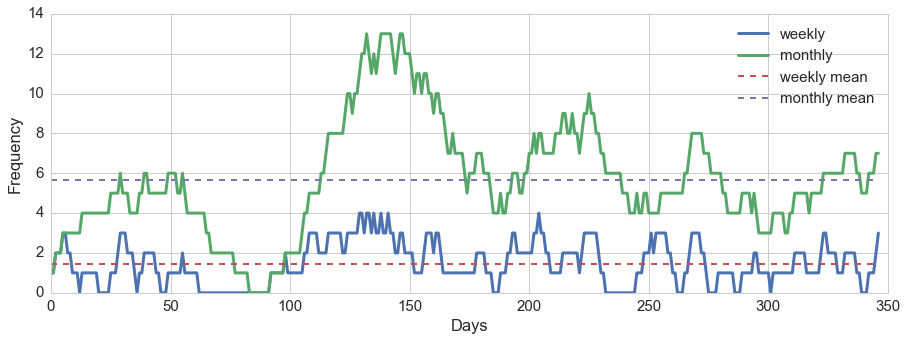

In [5]:
count_list['weekly'] = count_list['count'].rolling(window=7, min_periods=0).sum()
count_list['weekly mean'] = count_list['weekly'].mean()
count_list['monthly'] = count_list['count'].rolling(window=28, min_periods=0).sum()
count_list['monthly mean'] = count_list['monthly'].mean()

graph.plot(count_list['weekly'], linewidth=3)
graph.plot(count_list['monthly'], linewidth=3)
graph.plot(count_list['weekly mean'], linestyle='--')
graph.plot(count_list['monthly mean'], linestyle='--')
graph.ylabel('Frequency')
graph.xlabel('Days')
graph.legend(loc=0)
graph.show()